In [57]:
import pandas as pd
import numpy as np
import plotly.express as px

# State data

In [72]:
# Read in the final data
df = pd.read_csv("../../data/final/nci_state.csv")

In [73]:
# Read county geojson from the plotly GitHub
states = pd.read_csv("../../data/raw/state_codes.csv")

In [74]:
# Join to get state codes
df = df.set_index("fips").join(states.set_index("fips")).reset_index()

In [61]:
def plot_states(metric):
    # Grab the subset of data for this metric
    subset = df[["state", metric]]
    subset = subset.dropna()
    
    # Calculate summary statistics
    minimum = subset[metric].min()
    maximum = subset[metric].max()
    mean = subset[metric].mean()
    std = subset[metric].std()

    # Plot choropleth
    fig = px.choropleth(
        subset,
        #geojson=states,
        locations="state",
        color=metric,
        # Some series have extreme outliers so scale colors to 95% confidence interval
        range_color=(max(mean - 2 * std, minimum), min(mean + 2 * std, maximum)),
        color_continuous_scale="Viridis",
        locationmode = 'USA-states',
        scope="usa",
    )

    fig.update_layout(title_text=metric, title_x=0.5)
    fig.layout.coloraxis.colorbar.title = ""
    fig.update_layout(
        margin=dict(l=0, r=0, t=40, b=0),
    )

    fig.show("png")

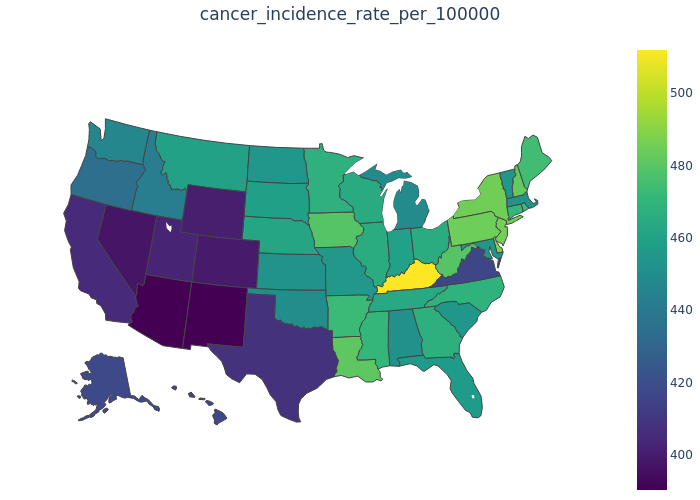

In [54]:
plot_states("cancer_incidence_rate_per_100000")

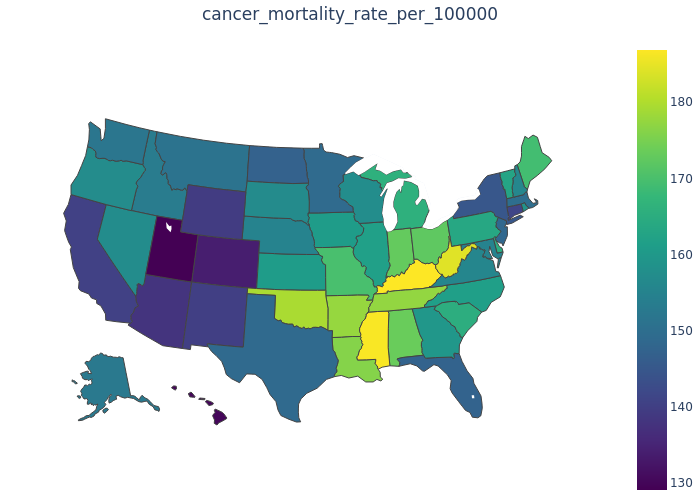

In [55]:
plot_states("cancer_mortality_rate_per_100000")

# Cervical cancer screening

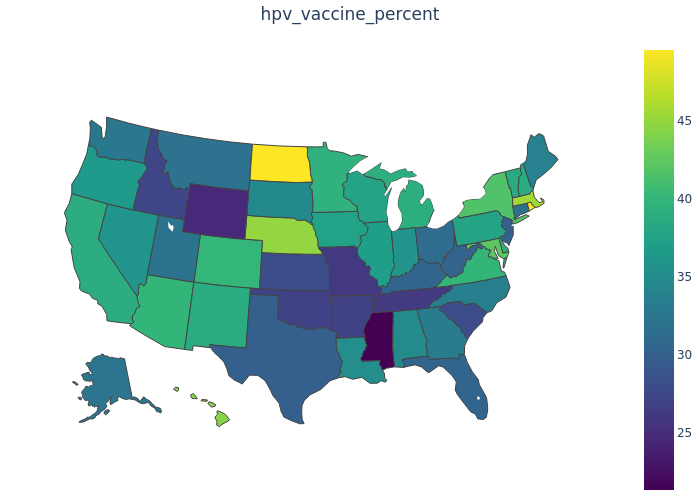

In [67]:
plot_states("hpv_vaccine_percent")

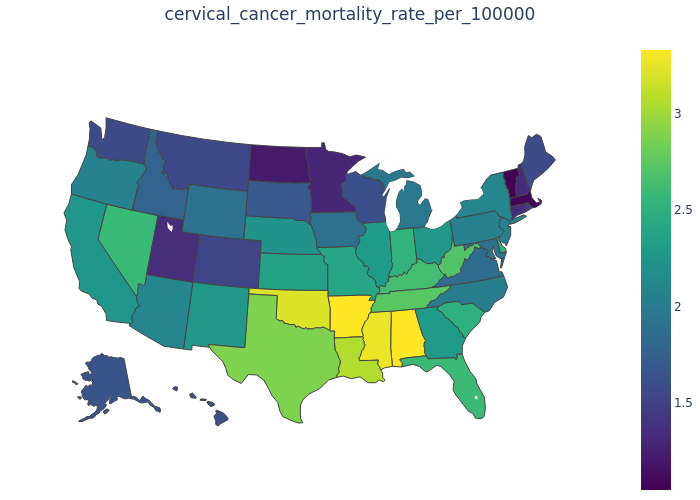

In [69]:
plot_states("cervical_cancer_mortality_rate_per_100000")

# Lung cancer risks

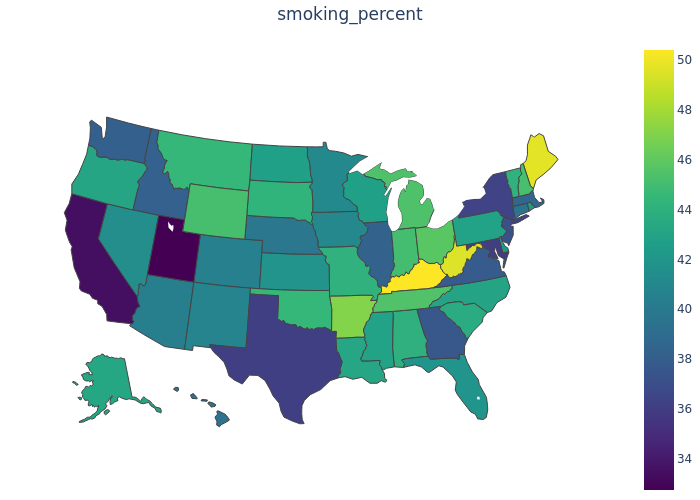

In [65]:
plot_states("smoking_percent")

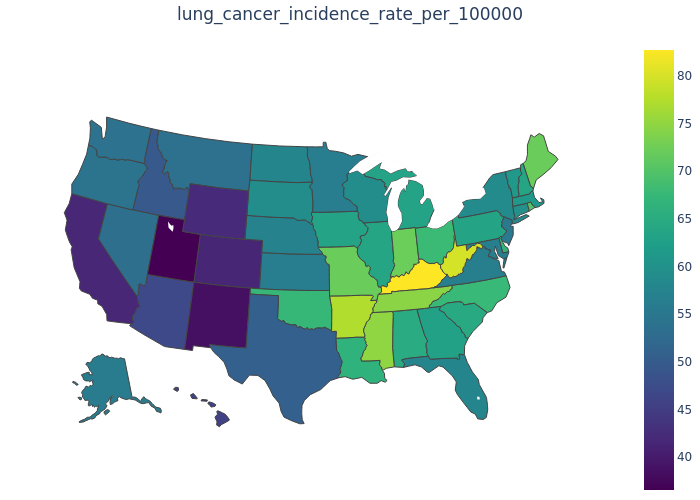

In [66]:
plot_states("lung_cancer_incidence_rate_per_100000")

# Colon cancer screening

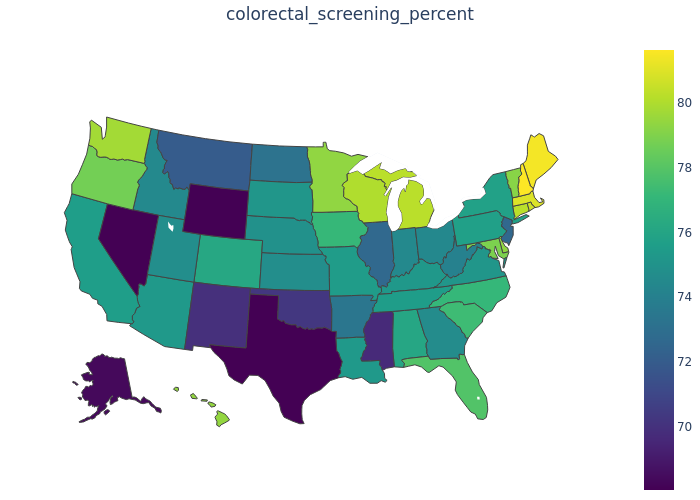

In [70]:
plot_states("colorectal_screening_percent")

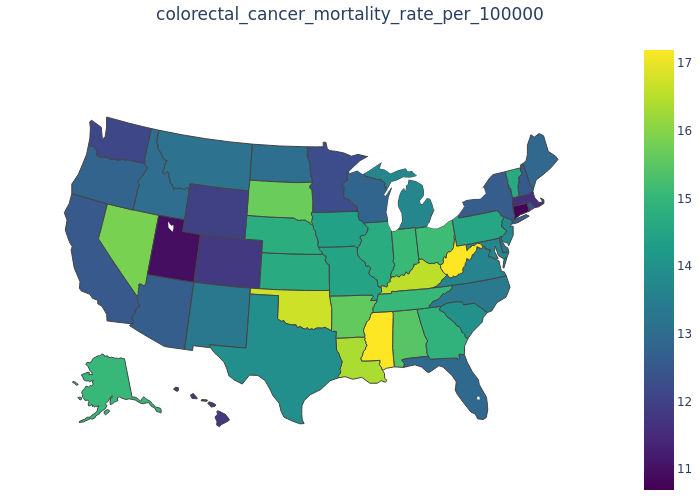

In [71]:
plot_states("colorectal_cancer_mortality_rate_per_100000")

# Melanoma

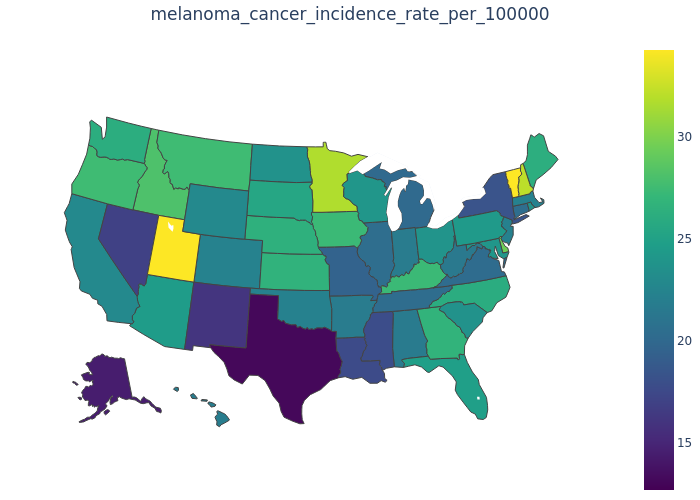

In [78]:
plot_states("melanoma_cancer_incidence_rate_per_100000")

In [75]:
df.columns

Index(['fips', 'cancer_incidence_rate_per_100000',
       'cancer_mortality_rate_per_100000',
       'breast_cancer_incidence_rate_per_100000',
       'breast_cancer_mortality_rate_per_100000',
       'cervical_cancer_incidence_rate_per_100000',
       'cervical_cancer_mortality_rate_per_100000',
       'colorectal_cancer_incidence_rate_per_100000',
       'colorectal_cancer_mortality_rate_per_100000',
       'lung_cancer_incidence_rate_per_100000',
       'lung_cancer_mortality_rate_per_100000',
       'prostate_cancer_incidence_rate_per_100000',
       'prostate_cancer_mortality_rate_per_100000',
       'melanoma_cancer_incidence_rate_per_100000',
       'melanoma_cancer_mortality_rate_per_100000',
       'colorectal_screening_percent', 'smoking_percent',
       'hpv_vaccine_percent', 'state'],
      dtype='object')